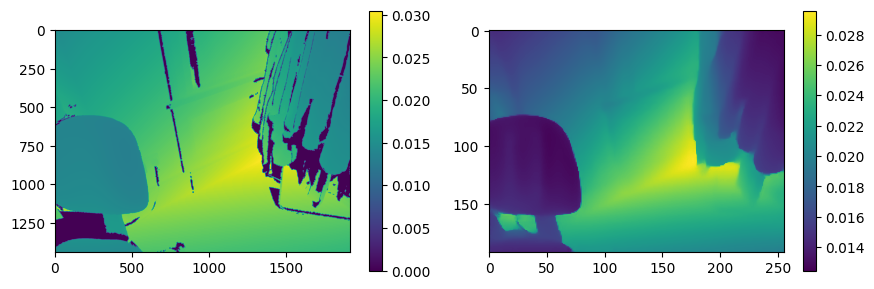

In [2]:
import matplotlib.pyplot as plt

ID = "48458663_8329.337"
FOLDER = 'arkit_scenes/dataset/raw/Validation/48458663'
hr = 'highres_depth'
lr = 'lowres_depth'

def plot_depths(id):
    fig, ax = plt.subplots(1, 2, figsize=(9, 3))
    im1 = plt.imread(f'{FOLDER}/{hr}/{id}.png')
    im2 = plt.imread(f'{FOLDER}/{lr}/{id}.png')
    
    # Plotting and adding colorbars
    img_display1 = ax[0].imshow(im1)
    img_display2 = ax[1].imshow(im2)
    fig.colorbar(img_display1, ax=ax[0], orientation='vertical')
    fig.colorbar(img_display2, ax=ax[1], orientation='vertical')
    
    plt.tight_layout()
    plt.show()
    return im1, im2

im1, im2 = plot_depths(ID)

In [3]:
im1.shape, im2.shape

((1440, 1920), (192, 256))

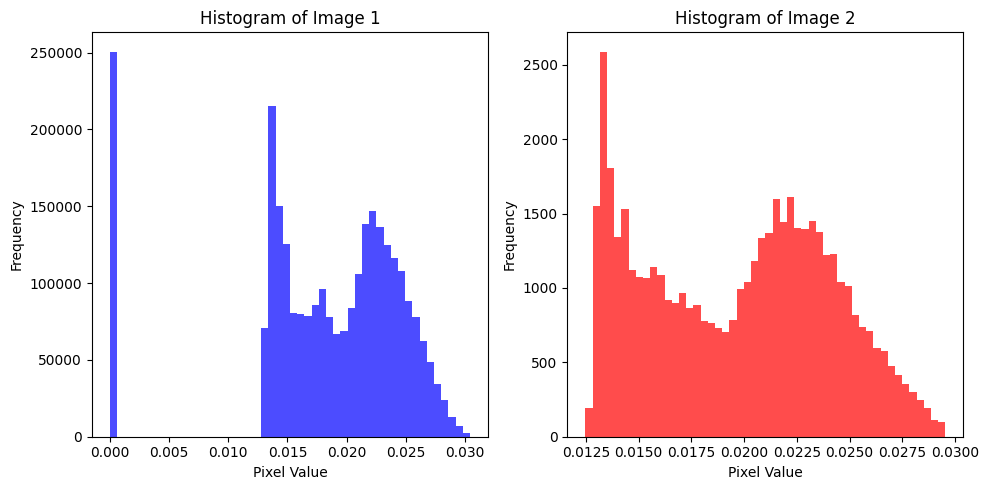

In [4]:
def plot_histograms(im1, im2):
    fig, ax = plt.subplots(1, 2, figsize=(10, 5))
    
    pixels_im1 = im1.flatten()
    pixels_im2 = im2.flatten()

    ax[0].hist(pixels_im1, bins=50, color='blue', alpha=0.7)
    ax[1].hist(pixels_im2, bins=50, color='red', alpha=0.7)

    ax[0].set_title('Histogram of Image 1')
    ax[1].set_title('Histogram of Image 2')

    ax[0].set_xlabel('Pixel Value')
    ax[1].set_xlabel('Pixel Value')
    
    ax[0].set_ylabel('Frequency')
    ax[1].set_ylabel('Frequency')
    
    plt.tight_layout()
    plt.show()

plot_histograms(im1, im2)


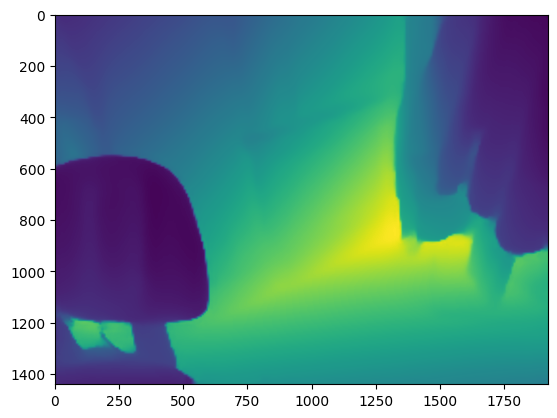

In [5]:
from skimage.transform import resize

# Rescale the image
im2_rescaled = resize(im2, (1440, 1920), mode='reflect', anti_aliasing=True, order=1)
plt.imshow(im2_rescaled)


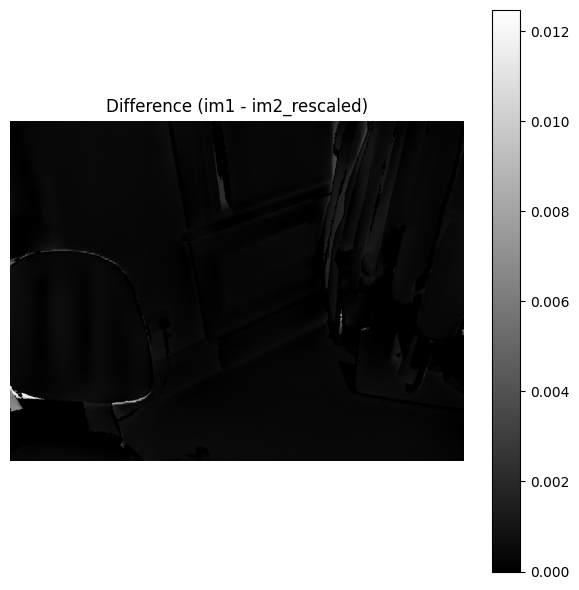

In [6]:
import numpy as np

difference = im1 - im2_rescaled
difference = np.clip(difference, 0, None)

fig, ax = plt.subplots(figsize=(6, 6))

cax = ax.imshow(difference, cmap='gray')
ax.set_title('Difference (im1 - im2_rescaled)')
ax.axis('off')

fig.colorbar(cax, ax=ax)
plt.tight_layout()
plt.show()

In [7]:
import open3d as o3d

In [14]:
color = im1 =  o3d.io.read_image(f'{FOLDER}/wide/{ID}.png')
depth = o3d.io.read_image(f'{FOLDER}/highres_depth/{ID}.png')

In [16]:
rgbd_image = o3d.geometry.RGBDImage.create_from_color_and_depth(
    color, depth)
print(rgbd_image)

RGBDImage of size 
Color image : 1920x1440, with 1 channels.
Depth image : 1920x1440, with 1 channels.
Use numpy.asarray to access buffer data.


In [17]:
pcd = o3d.geometry.PointCloud.create_from_rgbd_image(
    rgbd_image,
    o3d.camera.PinholeCameraIntrinsic(
        o3d.camera.PinholeCameraIntrinsicParameters.PrimeSenseDefault))
pcd.transform([[1,0,0,0],[0,-1,0,0],[0,0,-1,0],[0,0,0,1]])
o3d.visualization.draw_plotly([pcd])